In [1]:
# make the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Identification of Cointegrated Pairs of Stocks

In [2]:
# read back the pricing data
prices = pd.read_csv('media.csv', index_col=['date'])
prices.head(10)

ZEEL.NS       PVR.NS     SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
date                                                                           
01-01-2018  579.200012  1423.750000   998.000000   814.650024      60.700001   
02-01-2018  578.150024  1402.800049   995.200012   792.799988      59.950001   
03-01-2018  579.750000  1401.800049  1004.700012   853.400024      60.500000   
04-01-2018  580.000000  1399.000000  1028.199951   840.250000      60.000000   
05-01-2018  586.849976  1419.000000  1037.949951   832.700012      63.599998   
08-01-2018  593.900024  1460.199951  1044.449951   816.549988      64.250000   
09-01-2018  580.049988  1486.800049  1032.750000   853.700012      62.650002   
10-01-2018  580.500000  1469.000000  1022.150024   829.250000      62.099998   
11-01-2018  580.000000  1460.750000  1043.599976   828.900024      61.900002   
12-01-2018  591.000000  1463.150024  1077.099976   840.000000      66.050003   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
date                                                            
01-01-2018     287.200012  81.699997     59.849998   39.599998  
02-01-2018     280.850006  85.000000     58.950001   39.450001  
03-01-2018     281.000000  85.050003     58.849998   39.799999  
04-01-2018     281.750000  84.550003     60.250000   39.750000  
05-01-2018     287.850006  84.650002     60.599998   40.000000  
08-01-2018     290.799988  85.449997     61.000000   39.799999  
09-01-2018     294.399994  86.199997     60.200001   39.200001  
10-01-2018     287.000000  84.699997     59.099998   39.099998  
11-01-2018     289.000000  83.750000     60.349998   40.299999  
12-01-2018     285.950012  78.099998     62.349998   40.599998

In [3]:
# train test split 
train_close, test_close = train_test_split(prices, test_size=0.251012, shuffle=False)

In [4]:
# quick view of head and tail of train set
train_close.head(2).append(train_close.tail(2))

ZEEL.NS       PVR.NS    SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
date                                                                          
01-01-2018  579.200012  1423.750000  998.000000   814.650024      60.700001   
02-01-2018  578.150024  1402.800049  995.200012   792.799988      59.950001   
30-12-2020  219.149994  1290.000000  480.500000   814.799988      31.049999   
31-12-2020  223.500000  1320.199951  480.750000   835.450012      30.900000   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
date                                                            
01-01-2018     287.200012  81.699997     59.849998   39.599998  
02-01-2018     280.850006  85.000000     58.950001   39.450001  
30-12-2020     280.750000  13.350000     36.150002   32.700001  
31-12-2020     282.299988  13.400000     35.900002   33.150002

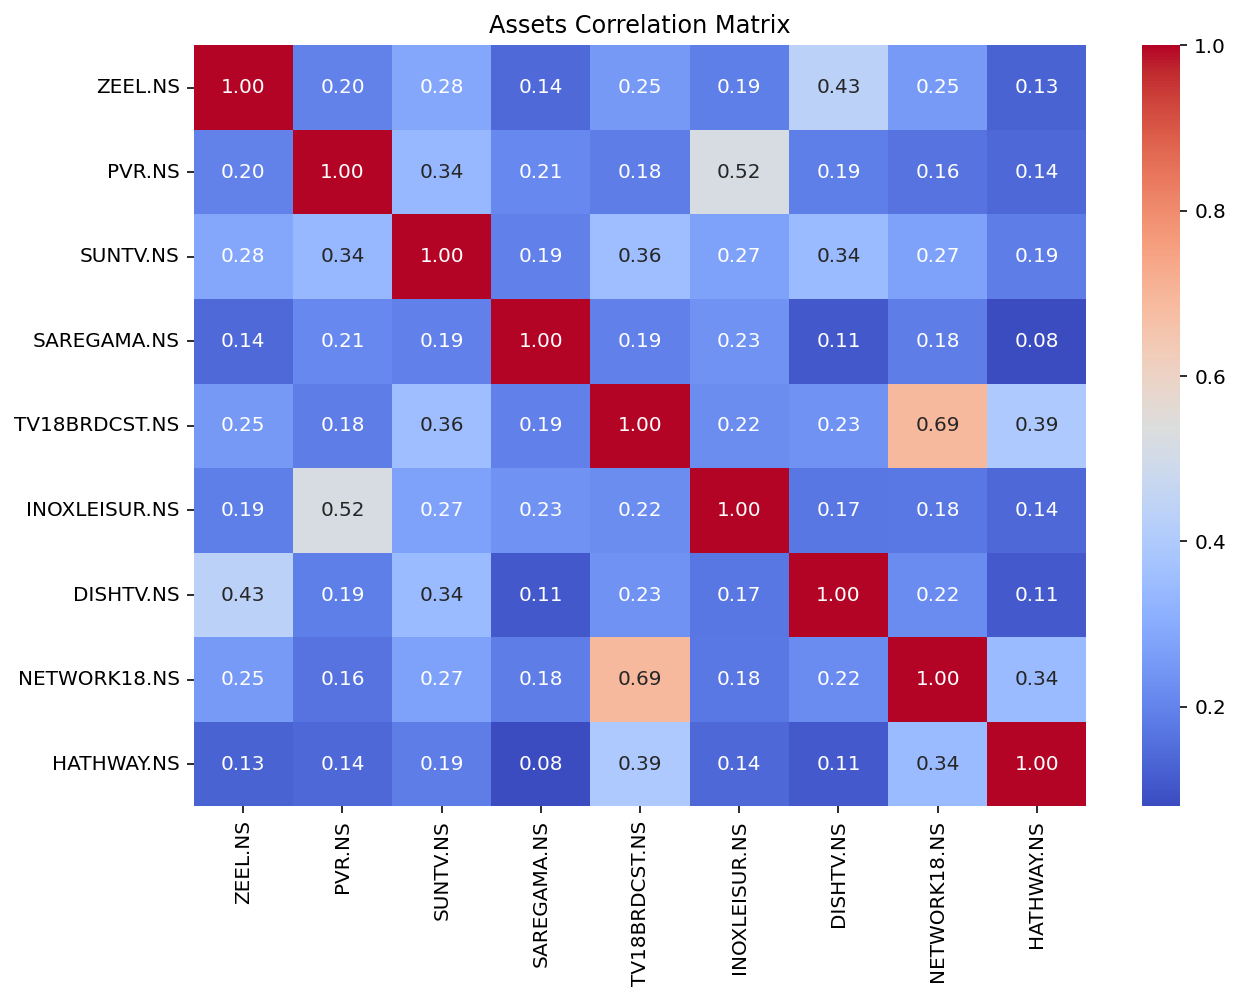

In [5]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.savefig('chart1', dpi=400)

In [6]:
# function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('SUNTV.NS', 'DISHTV.NS')]


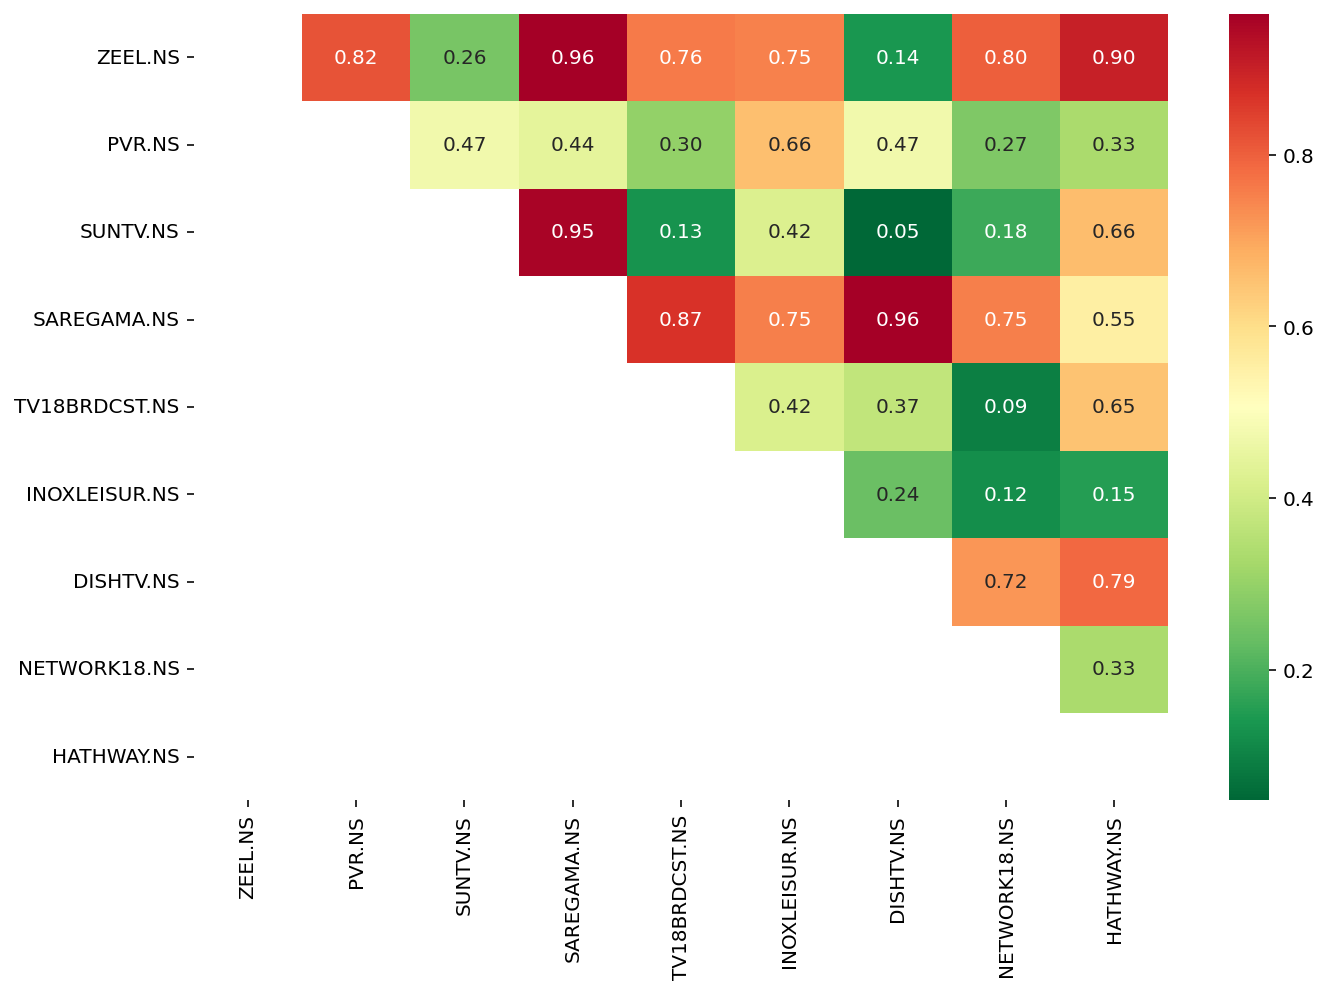

In [7]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
#ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.savefig('chart2', dpi=400) 

### Perform a Cointegration test for the Selected Pair

In [12]:
# final pair to test strategy
asset1 = 'ZEEL.NS'
asset2 = 'DISHTV.NS'

In [13]:
# create a train dataframe of 2 assets
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]

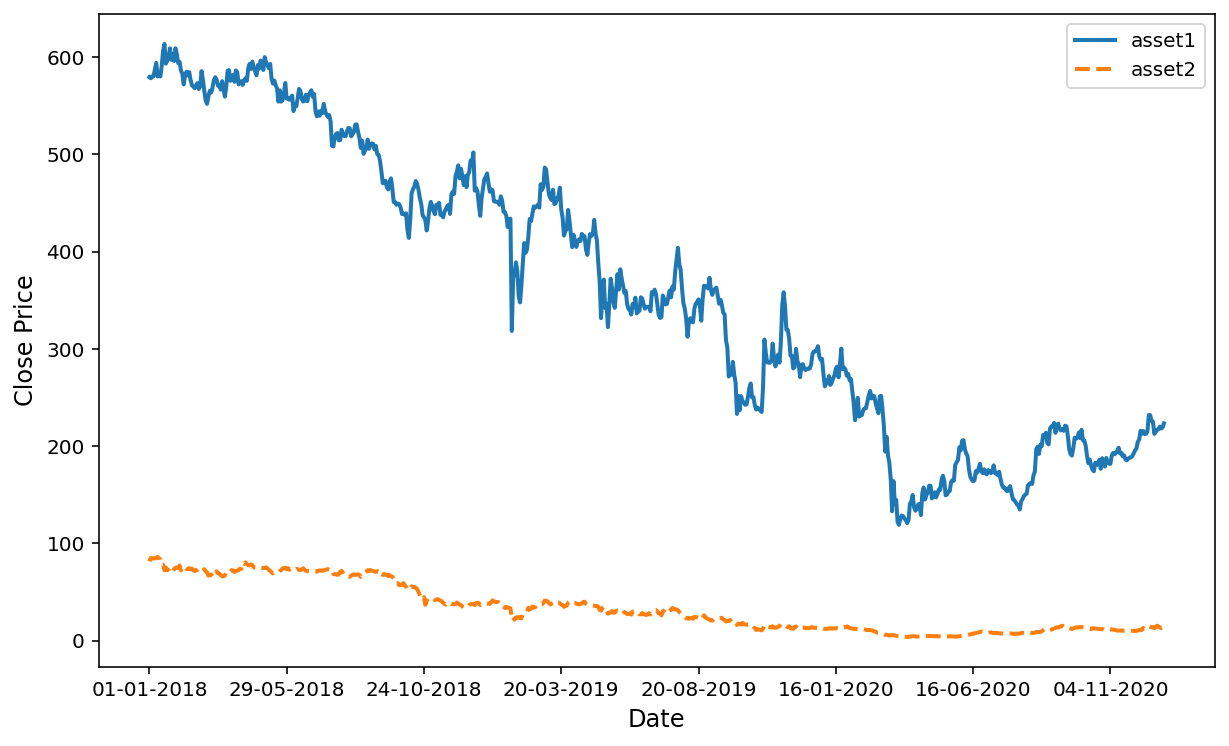

In [14]:
from matplotlib.dates import DateFormatter
# visualize closing prices
ax = train[['asset1']].plot(figsize=(10, 6), linewidth=2,linestyle='solid', label = "asset1")
plt.plot(train[['asset2']], linewidth=2, linestyle='dashed', label = "asset2")
ax.set_ylabel("Close Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.legend()
#date_form = DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_form)
#ax.grid(True);
plt.savefig('chart3', dpi=500) 

In [15]:
# run OLS regression
model=sm.OLS(train.asset2, train.asset1).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 asset2   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              8096.
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        16:48:09   Log-Likelihood:                         -2894.3
No. Observations:                 740   AIC:                                      5791.
Df Residuals:                     739   BIC:                                      5795.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
asset1         0.1032      0.001     89.978      0.000       0.101       0.105
==============================================================================
Omnibus:                      104.654   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.710
Skew:                           0.911   Prob(JB):                     1.23e-25
Kurtosis:                       2.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

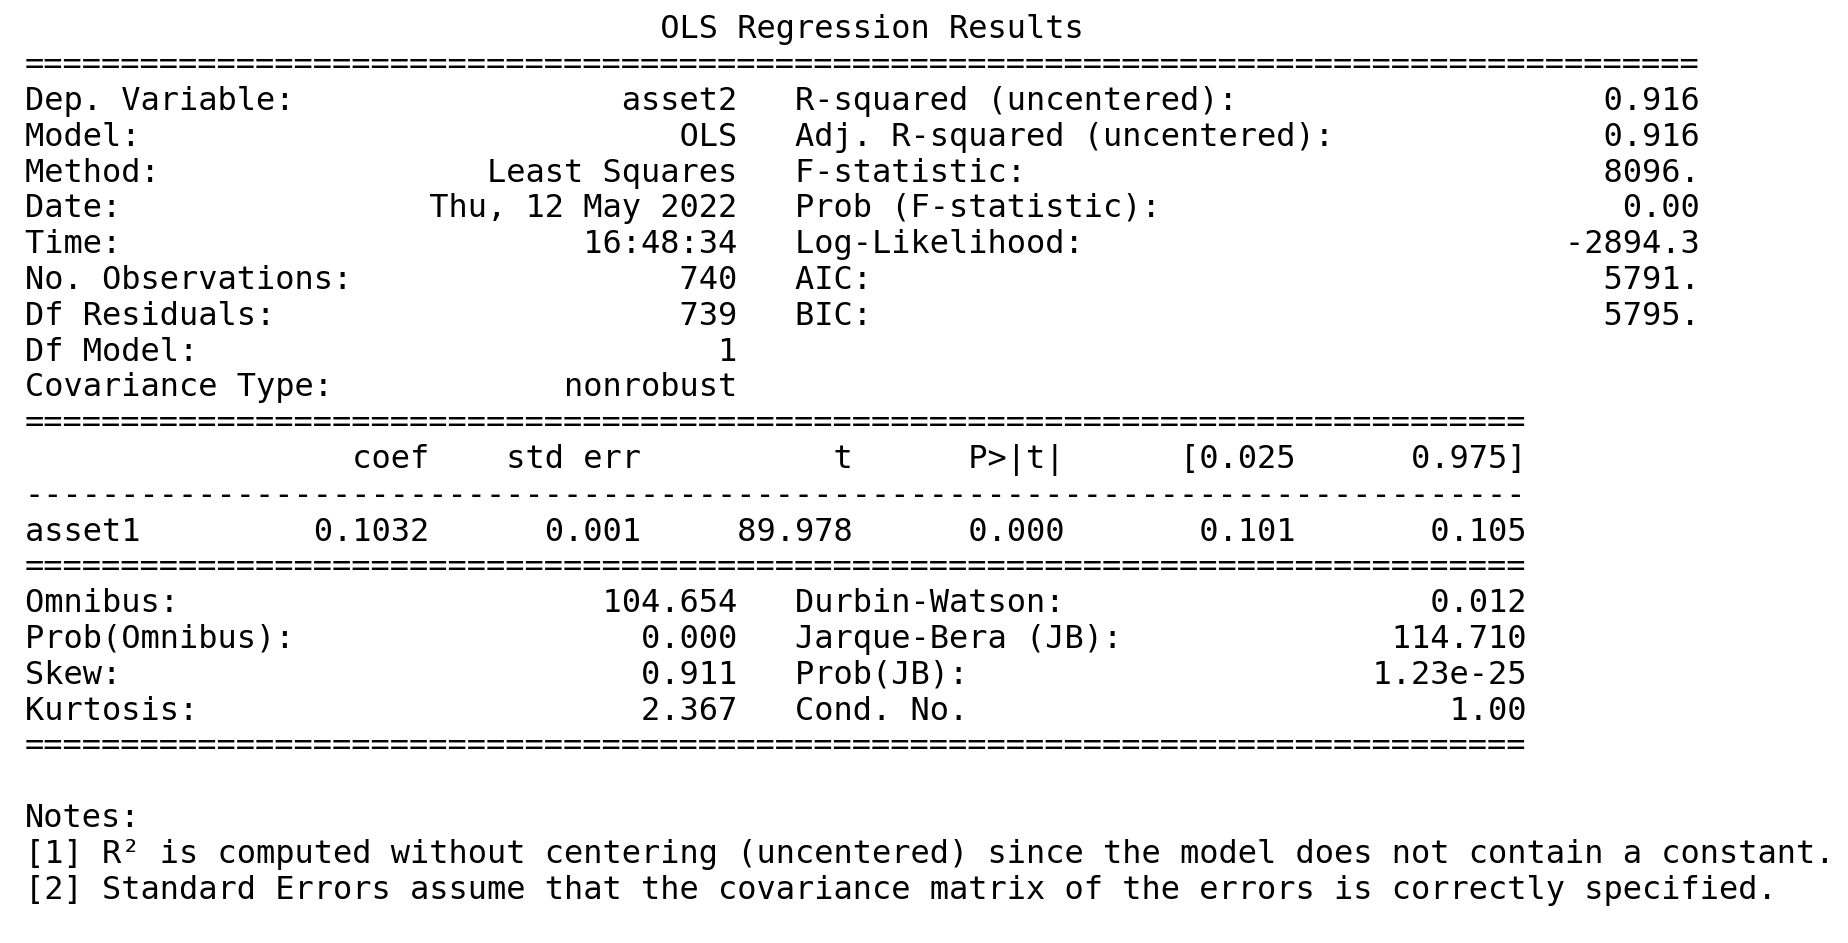

In [17]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.savefig('chart4', dpi=400);

In [18]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.10319330798180866


In [21]:
# calculate spread
residual = train.asset2 - model.params[0] * train.asset1

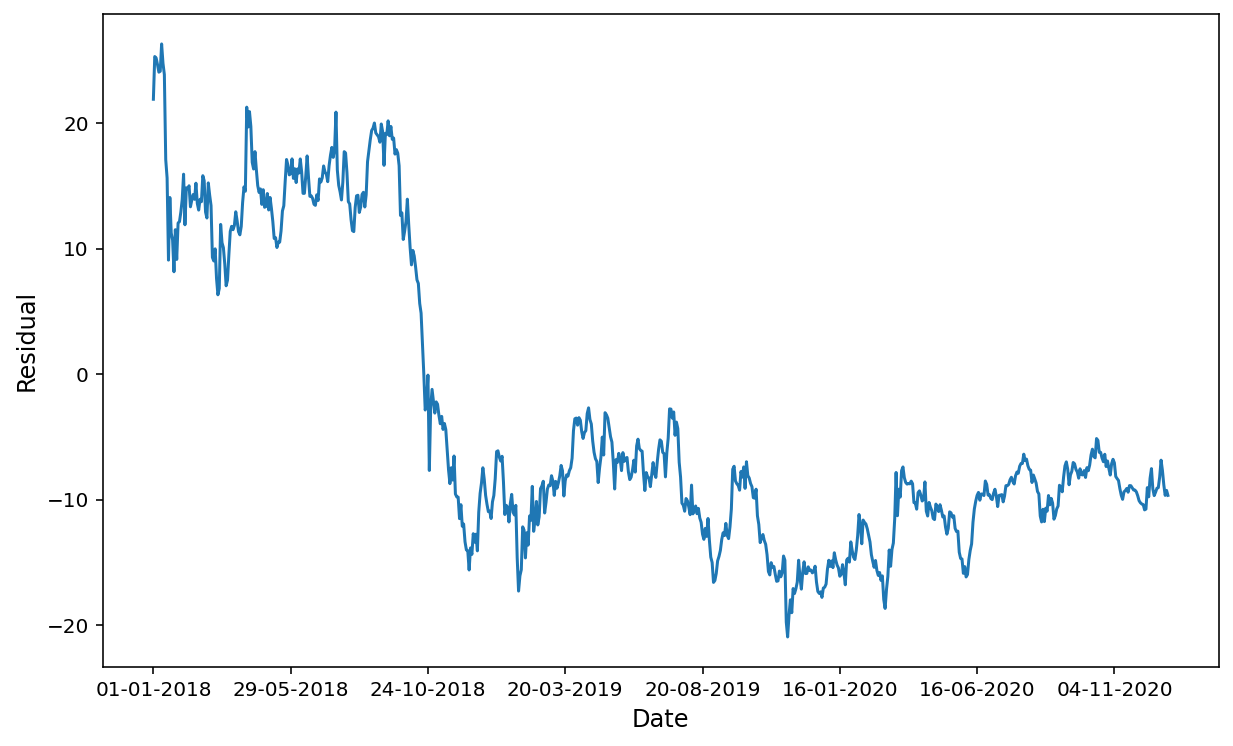

In [22]:
# Plot the residual
ax = residual.plot(figsize=(10, 6))
ax.set_ylabel("Residual", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.grid(True);
plt.savefig('chart5', dpi=500);

In [23]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(residual, maxlag = 1)
adf

(-2.4452857276288222,
 0.12936050189894288,
 1,
 738,
 {'1%': -3.4392418578608983,
  '5%': -2.86546426916434,
  '10%': -2.568859710342903},
 2484.519943072587)

In [24]:
print('Critical Value = ', adf[0])

Critical Value =  -2.4452857276288222


In [25]:
# probablity critical values
print(adf[4])

{'1%': -3.4392418578608983, '5%': -2.86546426916434, '10%': -2.568859710342903}


### Generate Trading Signals using z-score

In [26]:
# calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [27]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2

In [28]:
signals.head()

asset1  asset2
date                          
01-01-2021  224.949997   13.40
04-01-2021  219.050003   13.05
05-01-2021  222.500000   12.85
06-01-2021  221.199997   12.75
07-01-2021  218.949997   12.80

In [29]:
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [30]:
signals.head()

asset1  asset2         z  z upper limit  z lower limit
date                                                                  
01-01-2021  224.949997   13.40  0.015491            1.0           -1.0
04-01-2021  219.050003   13.05  0.014749            1.0           -1.0
05-01-2021  222.500000   12.85  0.224422            1.0           -1.0
06-01-2021  221.199997   12.75  0.237818            1.0           -1.0
07-01-2021  218.949997   12.80  0.141419            1.0           -1.0

In [31]:
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [32]:
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

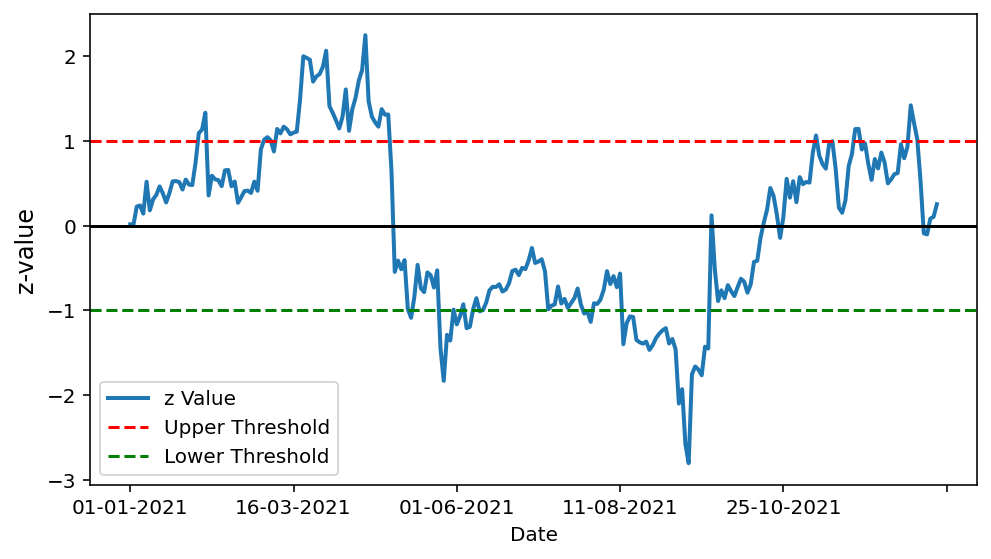

In [34]:
# # visualize z-score and upper and lower thresholds   
signals['z'].plot(label="z Value", figsize=(7, 4), linewidth=2)
#plt.title("Z-score Evaluation")
plt.ylabel("z-value", fontsize=12)
plt.xlabel("Date")
plt.axhline(signals['z'].mean(),linestyle= 'solid', color="black")
plt.axhline(signals['z upper limit'].mean(), linestyle= 'dashed',color="red", label="Upper Threshold")
plt.axhline(signals['z lower limit'].mean(), linestyle = 'dashed', color="green", label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.savefig('chart6', dpi=500);

In [35]:
# verify dataframe head and tail
signals.head(3).append(signals.tail(3))

asset1     asset2         z  z upper limit  z lower limit  \
date                                                                        
01-01-2021  224.949997  13.400000  0.015491            1.0           -1.0   
04-01-2021  219.050003  13.050000  0.014749            1.0           -1.0   
05-01-2021  222.500000  12.850000  0.224422            1.0           -1.0   
29-12-2021  317.950012  18.750000  0.082786            1.0           -1.0   
30-12-2021  318.100006  18.700001  0.103907            1.0           -1.0   
31-12-2021  320.799988  18.450001  0.253062            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
04-01-2021         0         0.0         0         0.0  
05-01-2021         0         0.0         0         0.0  
29-12-2021         0         0.0         0         0.0  
30-12-2021         0         0.0         0         0.0  
31-12-2021         0         0.0         0         0.0

In [36]:
# # check portfolio position
signals[signals.signals1 != 0].head(10)

asset1  asset2         z  z upper limit  z lower limit  \
date                                                                     
02-02-2021  242.899994   12.45  1.093166            1.0           -1.0   
03-02-2021  244.199997   12.45  1.134496            1.0           -1.0   
04-02-2021  249.449997   12.40  1.333380            1.0           -1.0   
02-03-2021  220.149994   11.40  1.014545            1.0           -1.0   
03-03-2021  222.000000   11.45  1.045118            1.0           -1.0   
04-03-2021  225.750000   11.70  1.008001            1.0           -1.0   
08-03-2021  224.800003   11.45  1.141910            1.0           -1.0   
09-03-2021  220.350006   11.30  1.089193            1.0           -1.0   
10-03-2021  221.649994   11.25  1.169233            1.0           -1.0   
12-03-2021  218.800003   11.15  1.138003            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
02-02-2021        -1        -1.0         1         1.0  
03-02-2021        -1         0.0         1         0.0  
04-02-2021        -1         0.0         1         0.0  
02-03-2021        -1        -1.0         1         1.0  
03-03-2021        -1         0.0         1         0.0  
04-03-2021        -1         0.0         1         0.0  
08-03-2021        -1        -1.0         1         1.0  
09-03-2021        -1         0.0         1         0.0  
10-03-2021        -1         0.0         1         0.0  
12-03-2021        -1         0.0         1         0.0

In [37]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

asset1     asset2         z  z upper limit  z lower limit  \
date                                                                        
01-01-2021  224.949997  13.400000  0.015491            1.0           -1.0   
02-02-2021  242.899994  12.450000  1.093166            1.0           -1.0   
05-02-2021  215.300003  12.200000  0.355975            1.0           -1.0   
02-03-2021  220.149994  11.400000  1.014545            1.0           -1.0   
05-03-2021  218.050003  11.500000  0.875801            1.0           -1.0   
10-11-2021  317.350006  16.850000  0.825517            1.0           -1.0   
26-11-2021  342.549988  17.450001  1.140794            1.0           -1.0   
30-11-2021  324.299988  17.049999  0.899414            1.0           -1.0   
21-12-2021  347.799988  17.100000  1.421346            1.0           -1.0   
24-12-2021  331.799988  18.350000  0.527836            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
02-02-2021        -1        -1.0         1         1.0  
05-02-2021         0         1.0         0        -1.0  
02-03-2021        -1        -1.0         1         1.0  
05-03-2021         0         1.0         0        -1.0  
10-11-2021         0         1.0         0        -1.0  
26-11-2021        -1        -1.0         1         1.0  
30-11-2021         0         1.0         0        -1.0  
21-12-2021        -1        -1.0         1         1.0  
24-12-2021         0         1.0         0        -1.0

In [38]:
signals.loc[signals['positions1'] == 1].index
signals['asset1'][signals['positions1'] == 1].value_counts()

215.300003    1
218.050003    1
183.750000    1
186.850006    1
201.550003    1
213.199997    1
218.300003    1
222.100006    1
200.550003    1
184.899994    1
317.350006    1
324.299988    1
331.799988    1
Name: asset1, dtype: int64

In [39]:
signals

asset1     asset2         z  z upper limit  z lower limit  \
date                                                                        
01-01-2021  224.949997  13.400000  0.015491            1.0           -1.0   
04-01-2021  219.050003  13.050000  0.014749            1.0           -1.0   
05-01-2021  222.500000  12.850000  0.224422            1.0           -1.0   
06-01-2021  221.199997  12.750000  0.237818            1.0           -1.0   
07-01-2021  218.949997  12.800000  0.141419            1.0           -1.0   
...                ...        ...       ...            ...            ...   
27-12-2021  317.950012  19.250000 -0.091548            1.0           -1.0   
28-12-2021  321.500000  19.500000 -0.103305            1.0           -1.0   
29-12-2021  317.950012  18.750000  0.082786            1.0           -1.0   
30-12-2021  318.100006  18.700001  0.103907            1.0           -1.0   
31-12-2021  320.799988  18.450001  0.253062            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
04-01-2021         0         0.0         0         0.0  
05-01-2021         0         0.0         0         0.0  
06-01-2021         0         0.0         0         0.0  
07-01-2021         0         0.0         0         0.0  
...              ...         ...       ...         ...  
27-12-2021         0         0.0         0         0.0  
28-12-2021         0         0.0         0         0.0  
29-12-2021         0         0.0         0         0.0  
30-12-2021         0         0.0         0         0.0  
31-12-2021         0         0.0         0         0.0  

[248 rows x 9 columns]

In [40]:
signals = signals.reset_index()

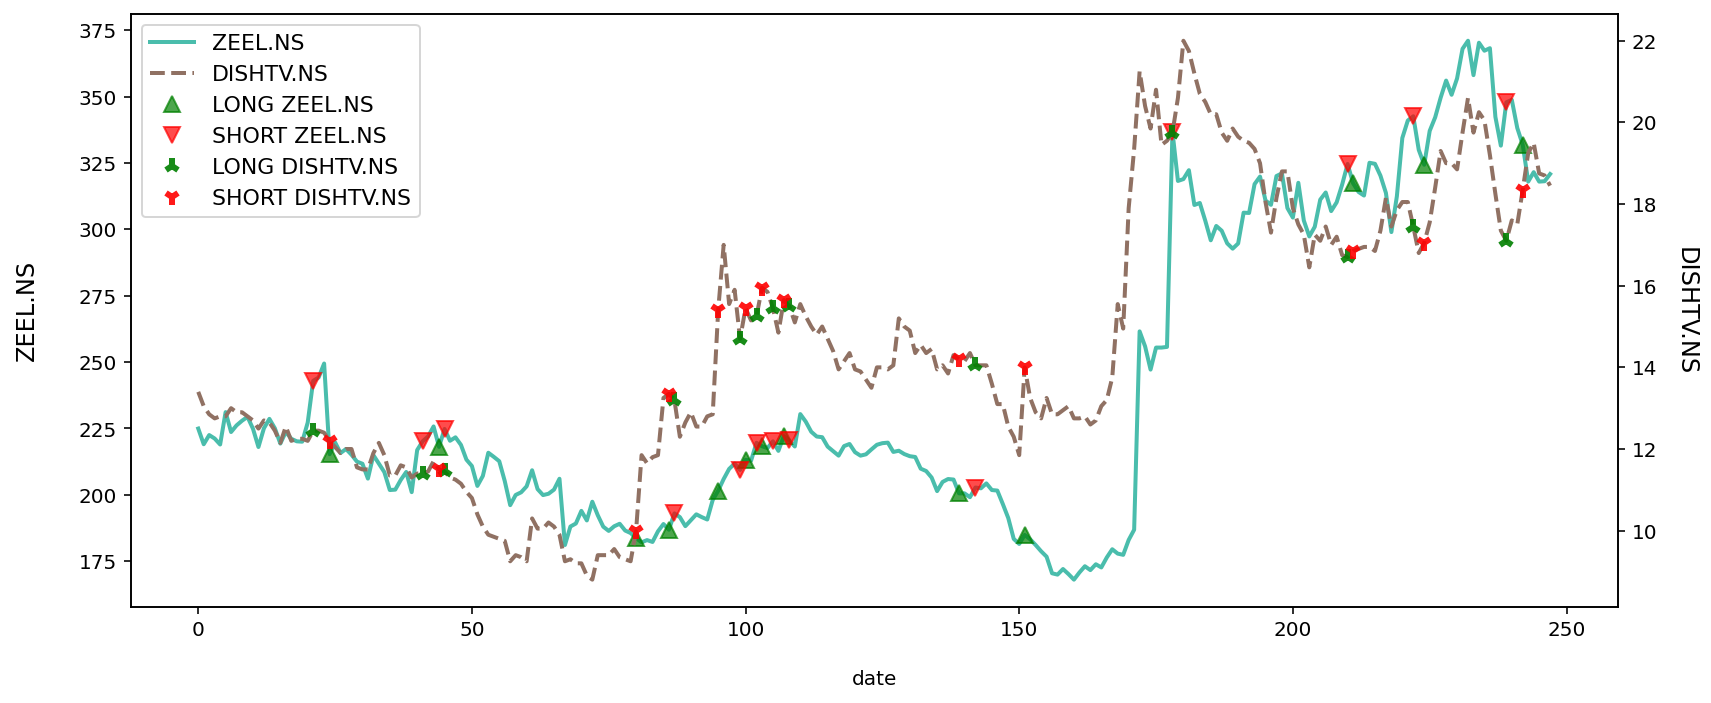

In [42]:
# visualize trading signals and position
fig=plt.figure(figsize=(12,5))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac', linestyle = 'solid', linewidth=2)
l2, = bx2.plot(signals['asset2'], c='#907163', linestyle = 'dashed', linewidth=2)

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, 
              marker='^', markersize=8, c='g',alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,
              marker='v',markersize=8, c='r',alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,
               marker='2',markersize=8, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,
               marker='1',markersize=8, c='r',alpha=0.9,markeredgewidth=3)
bx.set_ylabel(asset1,fontsize=12)
bx2.set_ylabel(asset2, rotation=270, fontsize=12)
bx.yaxis.labelpad=20
bx2.yaxis.labelpad=20
bx.set_xlabel('date')
# bx.xaxis.set_major_formatter(DateFormatter("%Y"))
# bx2.xaxis.set_major_formatter(DateFormatter("%Y"))
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'LONG {}'.format(asset1),
           'SHORT {}'.format(asset1),
           'LONG {}'.format(asset2),
           'SHORT {}'.format(asset2)], loc ='best', fontsize = 11)

#plt.title('Pair Trading - Trading Signals and Position')
plt.xlabel('Date', fontsize=12)
#plt.grid(True)
plt.tight_layout()
plt.savefig('chart7', dpi=500);

### Portfolio Profit and Loss Calculation

In [43]:
# initial capital to calculate the actual pnl
initial_capital = 100000

# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'])
positions2 = initial_capital// max(signals['asset2'])

In [44]:
# since there are two assets, we calculate each asset Pnl separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1']
portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1']

In [45]:
portfolio.head().append(portfolio.tail())

asset1  holdings1          cash1   total asset1  return1  positions1
0    224.949997        NaN            NaN            NaN      NaN         NaN
1    219.050003        0.0  100000.000000  100000.000000      NaN         0.0
2    222.500000        0.0  100000.000000  100000.000000      0.0         0.0
3    221.199997        0.0  100000.000000  100000.000000      0.0         0.0
4    218.949997        0.0  100000.000000  100000.000000      0.0         0.0
243  317.950012        0.0  177189.540935  177189.540935      0.0         0.0
244  321.500000        0.0  177189.540935  177189.540935      0.0         0.0
245  317.950012        0.0  177189.540935  177189.540935      0.0         0.0
246  318.100006        0.0  177189.540935  177189.540935      0.0         0.0
247  320.799988        0.0  177189.540935  177189.540935      0.0         0.0

In [46]:
portfolio[portfolio.positions1 != 0].head()

asset1     holdings1          cash1   total asset1       return1  \
0   224.949997           NaN            NaN            NaN           NaN   
21  242.899994 -65340.098359  165340.098359  100000.000000  0.000000e+00   
24  215.300003      0.000000  107424.397525  107424.397525  9.351110e-02   
41  220.149994 -59220.348359  166644.745884  107424.397525 -1.110223e-16   
44  218.050003      0.000000  107989.295050  107989.295050  1.955569e-02   

    positions1  
0          NaN  
21        -1.0  
24         1.0  
41        -1.0  
44         1.0

In [47]:
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2']

In [48]:
portfolio.to_csv('portfolio.csv')
portfolio.head().append(portfolio.tail())

asset1  holdings1          cash1   total asset1  return1  positions1  \
0    224.949997        NaN            NaN            NaN      NaN         NaN   
1    219.050003        0.0  100000.000000  100000.000000      NaN         0.0   
2    222.500000        0.0  100000.000000  100000.000000      0.0         0.0   
3    221.199997        0.0  100000.000000  100000.000000      0.0         0.0   
4    218.949997        0.0  100000.000000  100000.000000      0.0         0.0   
243  317.950012        0.0  177189.540935  177189.540935      0.0         0.0   
244  321.500000        0.0  177189.540935  177189.540935      0.0         0.0   
245  317.950012        0.0  177189.540935  177189.540935      0.0         0.0   
246  318.100006        0.0  177189.540935  177189.540935      0.0         0.0   
247  320.799988        0.0  177189.540935  177189.540935      0.0         0.0   

        asset2  holdings2          cash2   total asset2  return2  positions2  
0    13.400000        NaN            NaN            NaN      NaN         NaN  
1    13.050000        0.0  100000.000000  100000.000000      NaN         0.0  
2    12.850000        0.0  100000.000000  100000.000000      0.0         0.0  
3    12.750000        0.0  100000.000000  100000.000000      0.0         0.0  
4    12.800000        0.0  100000.000000  100000.000000      0.0         0.0  
243  19.250000        0.0   79547.491364   79547.491364      0.0         0.0  
244  19.500000        0.0   79547.491364   79547.491364      0.0         0.0  
245  18.750000        0.0   79547.491364   79547.491364      0.0         0.0  
246  18.700001        0.0   79547.491364   79547.491364      0.0         0.0  
247  18.450001        0.0   79547.491364   79547.491364      0.0         0.0

In [50]:
portfolio[portfolio.positions2 != 0].head()

asset1     holdings1          cash1   total asset1       return1  \
0   224.949997           NaN            NaN            NaN           NaN   
21  242.899994 -65340.098359  165340.098359  100000.000000  0.000000e+00   
24  215.300003      0.000000  107424.397525  107424.397525  9.351110e-02   
41  220.149994 -59220.348359  166644.745884  107424.397525 -1.110223e-16   
44  218.050003      0.000000  107989.295050  107989.295050  1.955569e-02   

    positions1  asset2     holdings2         cash2   total asset2   return2  \
0          NaN   13.40           NaN           NaN            NaN       NaN   
21        -1.0   12.45  56585.249136  43414.750864  100000.000000  0.000000   
24         1.0   12.20      0.000000  98863.750000   98863.750000 -0.009111   
41        -1.0   11.40  51812.998273  47050.751727   98863.750000  0.000000   
44         1.0   11.50      0.000000  99318.251727   99318.251727 -0.009069   

    positions2  
0          NaN  
21         1.0  
24        -1.0  
41         1.0  
44        -1.0

In [51]:
# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

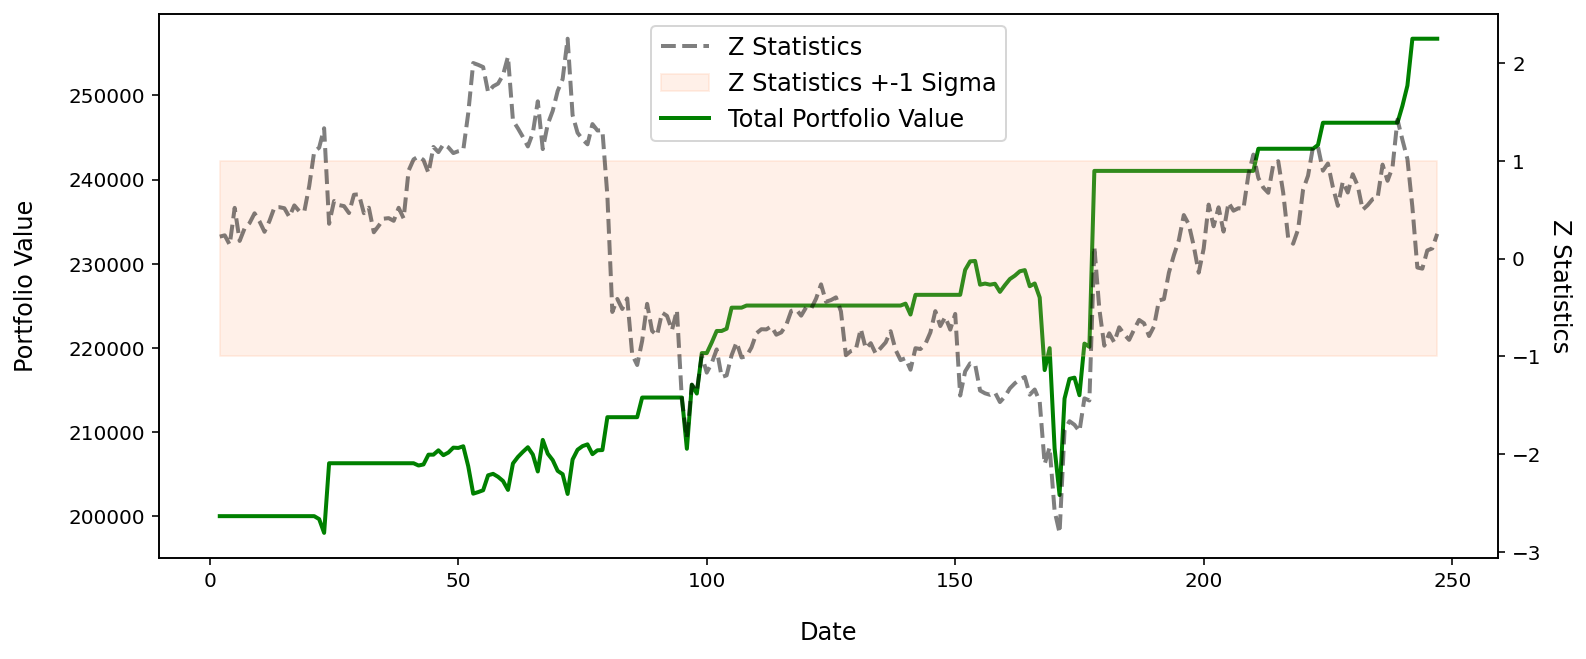

In [54]:
# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(12,5),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='g', linewidth = 2, linestyle='solid')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.5, linewidth = 2, 
               linestyle='dashed')

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.2,color='#ffb48f')

ax.set_ylabel('Portfolio Value', fontsize=12)
ax2.set_ylabel('Z Statistics',rotation=270, fontsize=12)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date', fontsize=12)
ax.xaxis.labelpad=15
#plt.title('Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper center', fontsize=12);
plt.savefig('chart8', dpi=500);

In [44]:
#portfolio = pd.read_csv('portfolio.csv')

In [45]:
# calculate CAGR
final_portfolio = portfolio['total asset'].iloc[-1]
final_portfolio

256737.03229919996

In [46]:
profit = final_portfolio - 2*initial_capital
profit

56737.03229919996

In [47]:
roi = (profit/(2*initial_capital))*100
roi

28.368516149599976

In [ ]:
# delta = (portfolio.index[-1] - portfolio.index[0]).days
delta = (portfolio.index[-1] - portfolio.index[0])
print('Number of days = ', delta)

In [46]:
YEAR_DAYS = 365
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

CAGR = 307.431%
